In [1]:
import pandas as pd

melb_df = pd.read_csv('data/melb_data_fe.csv')
melb_df.head()

,Suburb,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom,...,Longtitude,Regionname,Propertycount,MeanRoomsSquare,AreaRatio,MonthSale,AgeBuilding,WeekdaySale,StreetType,Weekend
0,Abbotsford,2,house,1480000.0,S,Biggin,2016-03-12,2.5,3067,2,...,144.9984,Northern Metropolitan,4019,25.20,-0.231707,3,46,5,St,1
1,Abbotsford,2,house,1035000.0,S,Biggin,2016-04-02,2.5,3067,2,...,144.9934,Northern Metropolitan,4019,15.80,-0.327660,4,116,5,St,1
2,Abbotsford,3,house,1465000.0,SP,Biggin,2017-04-03,2.5,3067,3,...,144.9944,Northern Metropolitan,4019,18.75,0.056338,4,117,0,St,0
3,Abbotsford,3,house,850000.0,PI,Biggin,2017-04-03,2.5,3067,3,...,144.9969,Northern Metropolitan,4019,15.75,0.145455,4,47,0,other,0
4,Abbotsford,4,house,1600000.0,VB,Nelson,2016-04-06,2.5,3067,3,...,144.9941,Northern Metropolitan,4019,17.75,0.083969,4,2,2,St,0


In [2]:
display(melb_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13580 entries, 0 to 13579
Data columns (total 26 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Suburb           13580 non-null  object 
 1   Rooms            13580 non-null  int64  
 2   Type             13580 non-null  object 
 3   Price            13580 non-null  float64
 4   Method           13580 non-null  object 
 5   SellerG          13580 non-null  object 
 6   Date             13580 non-null  object 
 7   Distance         13580 non-null  float64
 8   Postcode         13580 non-null  int64  
 9   Bedroom          13580 non-null  int64  
 10  Bathroom         13580 non-null  int64  
 11  Car              13580 non-null  int64  
 12  Landsize         13580 non-null  float64
 13  BuildingArea     13580 non-null  float64
 14  CouncilArea      12211 non-null  object 
 15  Lattitude        13580 non-null  float64
 16  Longtitude       13580 non-null  float64
 17  Regionname  

None

In [3]:
melb_df['Date'] = pd.to_datetime(melb_df['Date'], dayfirst=False)
melb_df['Quarter'] = melb_df['Date'].dt.quarter
melb_df['Quarter'].value_counts()

Quarter
3    4873
2    4359
4    2329
1    2019
Name: count, dtype: int64

In [4]:
cols_to_exclude = ['Date', 'Rooms', 'Bedroom', 'Bathroom', 'Car'] # список столбцов, которые мы не берём во внимание
max_unique_count = 150 # задаём максимальное число уникальных категорий
for col in melb_df.columns: # цикл по именам столбцов
    if melb_df[col].nunique() < max_unique_count and col not in cols_to_exclude: # проверяем условие
        melb_df[col] = melb_df[col].astype('category') # преобразуем тип столбца
display(melb_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13580 entries, 0 to 13579
Data columns (total 27 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Suburb           13580 non-null  category      
 1   Rooms            13580 non-null  int64         
 2   Type             13580 non-null  category      
 3   Price            13580 non-null  float64       
 4   Method           13580 non-null  category      
 5   SellerG          13580 non-null  category      
 6   Date             13580 non-null  datetime64[ns]
 7   Distance         13580 non-null  float64       
 8   Postcode         13580 non-null  int64         
 9   Bedroom          13580 non-null  int64         
 10  Bathroom         13580 non-null  int64         
 11  Car              13580 non-null  int64         
 12  Landsize         13580 non-null  float64       
 13  BuildingArea     13580 non-null  float64       
 14  CouncilArea      12211 non-null  categ

None

## 2. Сортировка данных в DataFrame
для этого используется метод sort_values()
Параметры метода:
* by — имя или список имён столбцов, по значениям которых производится сортировка.
* axis — ось, по которой производится сортировка (0 — строки, 1 — столбцы). По умолчанию сортировка производится по строкам.
* ascending — сортировка по возрастанию (от меньшего к большему). По умолчанию параметр выставлен на True, для сортировки по убыванию (от большего к меньшему) необходимо выставить его на False.
* ignore_index — создаются ли новые индексы в таблице. По умолчанию выставлен на False и сохраняет индексы изначальной таблицы.
* inplace — производится ли замена исходной таблицы на отсортированную. По умолчанию параметр выставлен на False, то есть замены не производится. Чтобы переопределить исходную таблицу на отсортированную, необходимо выставить этот параметр на True.

In [5]:
melb_df.sort_values(by='Price').head(10)

,Suburb,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom,...,Regionname,Propertycount,MeanRoomsSquare,AreaRatio,MonthSale,AgeBuilding,WeekdaySale,StreetType,Weekend,Quarter
2652,Footscray,1,unit,85000.0,PI,Burnham,2016-03-09,6.4,3011,1,...,Western Metropolitan,7570,42.000000,1.000000,3,9,2,St,0,1
1805,other,4,house,131000.0,PI,other,2017-02-25,8.9,3162,4,...,Southern Metropolitan,2379,17.222222,-0.525994,2,97,5,St,1,1
7303,Albion,1,unit,145000.0,PI,Biggin,2016-05-28,13.9,3020,2,...,Western Metropolitan,2185,31.500000,0.555556,5,46,5,St,1,2
1927,Coburg,4,house,145000.0,PI,Jellis,2016-04-06,7.8,3058,3,...,Northern Metropolitan,11204,20.500000,-0.531429,4,106,2,Rd,0,2
7940,Hawthorn,1,unit,160000.0,VB,HAR,2017-08-04,4.6,3122,1,...,Southern Metropolitan,11308,42.000000,-0.437500,8,8,4,St,0,3
12666,Brunswick,1,unit,170000.0,VB,Nelson,2017-09-16,5.2,3056,1,...,Northern Metropolitan,11918,42.000000,-0.816860,9,47,5,St,1,3
8811,Footscray,1,unit,170000.0,PI,Burnham,2017-01-07,5.1,3011,1,...,Western Metropolitan,7570,8.666667,-0.071429,1,4,5,St,1,1
7293,Albion,1,unit,185000.0,S,hockingstuart,2016-08-22,13.9,3020,1,...,Western Metropolitan,2185,14.333333,-0.964017,8,41,0,Rd,0,3
8504,West Footscray,1,unit,185000.0,PI,Jas,2017-04-29,8.2,3012,1,...,Western Metropolitan,5058,42.000000,1.000000,4,47,5,St,1,2
7305,Albion,2,unit,190000.0,SP,Burnham,2016-07-30,13.9,3020,2,...,Western Metropolitan,2185,25.200000,1.000000,7,46,5,St,1,3


In [6]:
melb_df.sort_values(by='Date', ascending=False)

,Suburb,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom,...,Regionname,Propertycount,MeanRoomsSquare,AreaRatio,MonthSale,AgeBuilding,WeekdaySale,StreetType,Weekend,Quarter
11144,Northcote,4,house,1955000.0,SP,McGrath,2017-12-08,5.3,3070,4,...,Northern Metropolitan,11364,12.600000,0.923664,12,47,4,St,0,4
11217,Surrey Hills,3,house,1775000.0,PI,Jellis,2017-12-08,10.2,3127,3,...,Southern Metropolitan,5457,15.750000,-0.721854,12,47,4,Rd,0,4
11206,St Kilda,4,house,1600000.0,VB,Gary,2017-12-08,5.0,3182,4,...,Southern Metropolitan,13240,16.000000,-0.586028,12,107,4,St,0,4
11207,Strathmore,7,house,2000000.0,SP,Nelson,2017-12-08,8.2,3041,7,...,Western Metropolitan,3284,20.882353,-0.262721,12,18,4,Rd,0,4
11208,Strathmore,4,house,1610000.0,S,other,2017-12-08,8.2,3041,4,...,Western Metropolitan,3284,24.909091,-0.517181,12,62,4,St,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1555,Camberwell,4,house,2650000.0,S,Jellis,2016-03-09,7.8,3124,4,...,Southern Metropolitan,8920,18.900000,-0.550535,3,126,2,Rd,0,1
4510,Oak Park,3,house,892000.0,S,Nelson,2016-03-09,11.5,3046,3,...,Northern Metropolitan,2651,18.000000,-0.714609,3,46,2,St,0,1
4388,Northcote,3,house,1200000.0,S,Nelson,2016-03-09,5.5,3070,3,...,Northern Metropolitan,11364,17.857143,-0.264706,3,96,2,St,0,1
6184,Surrey Hills,3,house,1205000.0,S,Fletchers,2016-01-28,11.2,3127,3,...,Southern Metropolitan,5457,18.000000,-0.590909,1,46,3,Rd,0,1


если сортировать по значениям нескольких столбцов, то важно написать их в нужной последовательности


In [7]:
melb_df.sort_values(by=['Distance', 'Price']).loc[::10, ['Distance', 'Price']]

,Distance,Price
11428,0.0,387000.0
10512,0.7,600000.0
5727,1.2,485000.0
8671,1.2,595000.0
5736,1.2,740000.0
...,...,...
12011,38.0,680000.0
10673,38.0,810000.0
13429,38.0,1155000.0
11102,41.0,650000.0


Мы получили таблицу, отсортированную по возрастанию расстояния до центра города. Если встречаются объекты недвижимости, у которых расстояние оказывается одинаковым, то внутри такой группы производится сортировка по цене объекта.

In [8]:
mask1 = melb_df['AreaRatio'] < -0.8
mask2 = melb_df['Type'] == 'townhouse'
mask3 = melb_df['SellerG'] == 'McGrath'
melb_df[mask1 & mask2 & mask3].sort_values(
    by=['Date', 'AreaRatio'],
    ascending=[True, False],
    ignore_index=True
).loc[:, ['Date', 'AreaRatio']]

,Date,AreaRatio
0,2016-07-26,-0.974922
1,2016-09-24,-0.971831
2,2016-11-27,-0.953608
3,2016-12-11,-0.945946
4,2017-08-04,-0.947368
5,2017-08-04,-0.970874


Вместо параметра inplace лучше воспользоваться copy

In [9]:
filtered = melb_df[melb_df['Rooms'] > 5].copy()

In [10]:
melb_df.sort_values(by='AreaRatio', ascending=True, ignore_index = True ).loc[1557]

Suburb                          Bulleen
Rooms                                 4
Type                              house
Price                         1580000.0
Method                                S
SellerG                           Barry
Date                2017-12-08 00:00:00
Distance                           10.8
Postcode                           3105
Bedroom                               4
Bathroom                              2
Car                                   2
Landsize                          773.0
BuildingArea                      126.0
CouncilArea                  Manningham
Lattitude                     -37.76207
Longtitude                    145.09336
Regionname         Eastern Metropolitan
Propertycount                      4480
MeanRoomsSquare                    12.6
AreaRatio                     -0.719689
MonthSale                            12
AgeBuilding                          47
WeekdaySale                           4
StreetType                        other


In [11]:
filter1 = melb_df['Type'] == 'townhouse'
filter2 = melb_df['Rooms'] > 2
melb_df[filter1 & filter2].sort_values(
    by = ['Rooms','MeanRoomsSquare'],
    ascending=[True, False],
    ignore_index=True).loc[18]

Suburb                     Brighton East
Rooms                                  3
Type                           townhouse
Price                          1300000.0
Method                                PI
SellerG                           Buxton
Date                 2016-09-17 00:00:00
Distance                            10.7
Postcode                            3187
Bedroom                                3
Bathroom                               2
Car                                    2
Landsize                           337.0
BuildingArea                       222.0
CouncilArea                      Bayside
Lattitude                       -37.9196
Longtitude                      145.0205
Regionname         Southern Metropolitan
Propertycount                       6938
MeanRoomsSquare                    27.75
AreaRatio                      -0.205725
MonthSale                              9
AgeBuilding                           16
WeekdaySale                            5
StreetType      

## 3. Группировка данных в DataFrame
Для группировки данных в pandas используется метод groupby()
Параметры метода:
* by — имя или список имён столбцов, по которым производится группировка.
* axis — ось, по которой производится группировка (0 — строки, 1 — столбцы). По умолчанию группировка производится по строкам.
* as_index — добавляется ли дополнительный индекс к таблице. По умолчанию установлен на True.


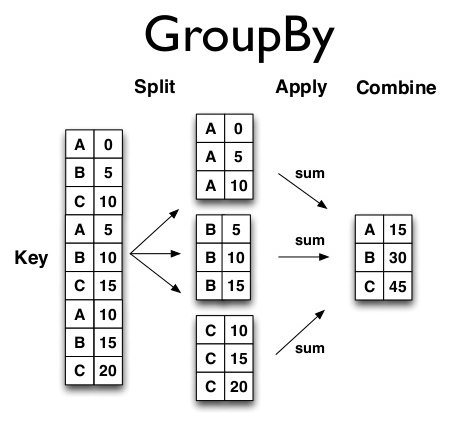

In [12]:
melb_df.groupby(by='Type').mean(numeric_only=True)

C:\Users\vladi\AppData\Local\Temp\ipykernel_33548\2774055988.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  melb_df.groupby(by='Type').mean(numeric_only=True)


,Rooms,Price,Distance,Postcode,Bedroom,Bathroom,Car,Landsize,BuildingArea,Lattitude,Longtitude,Propertycount,MeanRoomsSquare,AreaRatio,AgeBuilding
Type,,,,,,,,,,,,,,,
house,3.260874,1.242665e+06,10.979479,3104.080643,3.229336,1.613822,1.772674,617.181924,152.162553,-37.803795,144.994700,7259.025505,18.996731,-0.490031,55.669700
townhouse,2.837522,9.337351e+05,9.851346,3100.777379,2.814183,1.809695,1.555655,279.606822,134.649710,-37.815782,144.996489,7094.459605,18.569847,-0.094916,26.690305
unit,1.963871,6.051275e+05,7.607391,3110.797481,1.966523,1.183295,1.128936,477.314219,102.235863,-37.823710,144.996363,8199.280080,21.068242,0.319883,39.703016


In [13]:
melb_df.groupby(by='Type', as_index = False).mean(numeric_only=True)

C:\Users\vladi\AppData\Local\Temp\ipykernel_33548\4155525366.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  melb_df.groupby(by='Type', as_index = False).mean(numeric_only=True)


,Type,Rooms,Price,Distance,Postcode,Bedroom,Bathroom,Car,Landsize,BuildingArea,Lattitude,Longtitude,Propertycount,MeanRoomsSquare,AreaRatio,AgeBuilding
0,house,3.260874,1.242665e+06,10.979479,3104.080643,3.229336,1.613822,1.772674,617.181924,152.162553,-37.803795,144.994700,7259.025505,18.996731,-0.490031,55.669700
1,townhouse,2.837522,9.337351e+05,9.851346,3100.777379,2.814183,1.809695,1.555655,279.606822,134.649710,-37.815782,144.996489,7094.459605,18.569847,-0.094916,26.690305
2,unit,1.963871,6.051275e+05,7.607391,3110.797481,1.966523,1.183295,1.128936,477.314219,102.235863,-37.823710,144.996363,8199.280080,21.068242,0.319883,39.703016


In [14]:
melb_df.groupby('Type')['Price'].mean()

C:\Users\vladi\AppData\Local\Temp\ipykernel_33548\2328732824.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  melb_df.groupby('Type')['Price'].mean()


Type
house        1.242665e+06
townhouse    9.337351e+05
unit         6.051275e+05
Name: Price, dtype: float64

In [15]:
melb_df.groupby('Regionname')['Distance'].min().sort_values(ascending=False)

C:\Users\vladi\AppData\Local\Temp\ipykernel_33548\3783769093.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  melb_df.groupby('Regionname')['Distance'].min().sort_values(ascending=False)


Regionname
Western Victoria              29.8
Eastern Victoria              25.2
Northern Victoria             21.8
South-Eastern Metropolitan    14.7
Eastern Metropolitan           7.8
Western Metropolitan           4.3
Southern Metropolitan          0.7
Northern Metropolitan          0.0
Name: Distance, dtype: float64

### Группировка данных по одному критерию с несколькими агрегациями
совершается с помощью agg()

In [16]:
melb_df.groupby('MonthSale')['Price'].agg(
    ['count', 'mean', 'max']
).sort_values(by='count', ascending=False)

C:\Users\vladi\AppData\Local\Temp\ipykernel_33548\3700124206.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  melb_df.groupby('MonthSale')['Price'].agg(


,count,mean,max
MonthSale,,,
8,1850,1.056371e+06,6500000.0
7,1835,9.314698e+05,9000000.0
5,1644,1.097807e+06,8000000.0
6,1469,1.068981e+06,7650000.0
3,1408,1.146762e+06,5600000.0
4,1246,1.050479e+06,5500000.0
9,1188,1.126349e+06,6400000.0
10,854,1.135970e+06,6250000.0
11,750,1.142503e+06,5050000.0


In [17]:
melb_df.groupby('MonthSale')['Price'].agg('describe')

C:\Users\vladi\AppData\Local\Temp\ipykernel_33548\701566850.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  melb_df.groupby('MonthSale')['Price'].agg('describe')


,count,mean,std,min,25%,50%,75%,max
MonthSale,,,,,,,,
1,278.0,9.397921e+05,577668.924214,170000.0,570500.0,795000.0,1111250.0,5200000.0
2,333.0,1.169051e+06,671564.357417,131000.0,710000.0,1020000.0,1478000.0,4735000.0
3,1408.0,1.146762e+06,709573.596867,85000.0,680000.0,945000.0,1400000.0,5600000.0
4,1246.0,1.050479e+06,591892.902979,145000.0,655000.0,905500.0,1298750.0,5500000.0
5,1644.0,1.097807e+06,668492.867996,145000.0,650000.0,905000.0,1371250.0,8000000.0
6,1469.0,1.068981e+06,606010.069052,222000.0,660000.0,900000.0,1325000.0,7650000.0
7,1835.0,9.314698e+05,537390.803161,190000.0,586750.0,800000.0,1150000.0,9000000.0
8,1850.0,1.056371e+06,619617.476541,160000.0,635000.0,892000.0,1310000.0,6500000.0
9,1188.0,1.126349e+06,608734.690742,170000.0,725000.0,980000.0,1360000.0,6400000.0


In [18]:
melb_df.groupby('Regionname')['SellerG'].agg(
    		['nunique', set]
)

C:\Users\vladi\AppData\Local\Temp\ipykernel_33548\1626580071.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  melb_df.groupby('Regionname')['SellerG'].agg(


,nunique,set
Regionname,,
Eastern Metropolitan,26,"{other, Gary, Philip, Marshall, HAR, Buxton, M..."
Eastern Victoria,11,"{O'Brien, other, Eview, McGrath, Barry, HAR, C..."
Northern Metropolitan,40,"{other, Philip, Sweeney, Marshall, HAR, YPA, R..."
Northern Victoria,11,"{other, Raine, McGrath, Buckingham, McDonald, ..."
South-Eastern Metropolitan,25,"{other, Gary, HAR, O'Brien, Eview, Buxton, McG..."
Southern Metropolitan,38,"{other, Gary, Philip, Marshall, HAR, O'Brien, ..."
Western Metropolitan,34,"{other, Sweeney, HAR, YPA, O'Brien, Rendina, B..."
Western Victoria,6,"{Raine, other, HAR, YPA, hockingstuart, Ray}"


In [19]:
melb_df.groupby('Rooms')['Price'].mean()

Rooms
1     4.338245e+05
2     7.750812e+05
3     1.076081e+06
4     1.445282e+06
5     1.870260e+06
6     1.849366e+06
7     1.920700e+06
8     1.602750e+06
10    9.000000e+05
Name: Price, dtype: float64

In [20]:
melb_df.groupby('Regionname')['Lattitude'].agg(('describe'))

C:\Users\vladi\AppData\Local\Temp\ipykernel_33548\473450445.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  melb_df.groupby('Regionname')['Lattitude'].agg(('describe'))


,count,mean,std,min,25%,50%,75%,max
Regionname,,,,,,,,
Eastern Metropolitan,1471.0,-37.788820,0.047890,-37.90383,-37.823185,-37.777000,-37.751800,-37.68508
Eastern Victoria,53.0,-37.959292,0.147067,-38.16439,-38.070540,-38.026210,-37.788830,-37.75735
Northern Metropolitan,3890.0,-37.747258,0.049639,-37.93940,-37.785100,-37.753380,-37.713625,-37.56857
Northern Victoria,41.0,-37.599620,0.084455,-37.68503,-37.672770,-37.638260,-37.507330,-37.40853
South-Eastern Metropolitan,450.0,-37.993727,0.073411,-38.18255,-38.028280,-37.981155,-37.931123,-37.89210
Southern Metropolitan,4695.0,-37.866981,0.043080,-37.99035,-37.901200,-37.858800,-37.835670,-37.78142
Western Metropolitan,2948.0,-37.782382,0.051251,-37.91859,-37.811885,-37.780400,-37.750275,-37.56005
Western Victoria,32.0,-37.695163,0.011579,-37.71691,-37.702827,-37.695075,-37.687370,-37.67344


In [21]:
may_sept_sales = melb_df[(melb_df['Date'] > '2017-05-01') & (melb_df['Date'] < '2017-09-02')]
may_sept_sales

,Suburb,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom,...,Regionname,Propertycount,MeanRoomsSquare,AreaRatio,MonthSale,AgeBuilding,WeekdaySale,StreetType,Weekend,Quarter
7431,Aberfeldie,4,house,1330000.0,S,Nelson,2017-06-05,9.1,3040,4,...,Western Metropolitan,1543,12.600000,-0.368421,6,47,0,St,0,2
7432,Aberfeldie,3,house,1300000.0,S,Nelson,2017-08-04,9.1,3040,3,...,Western Metropolitan,1543,26.666667,0.000000,8,4,4,St,0,3
7433,Aberfeldie,2,house,470000.0,S,Barry,2017-08-04,9.1,3040,2,...,Western Metropolitan,1543,14.460000,0.016163,8,37,4,St,0,3
7435,Albert Park,3,house,1700000.0,VB,Greg,2017-06-05,3.3,3206,3,...,Southern Metropolitan,3280,16.571429,-0.210884,6,107,0,St,0,2
7436,Albert Park,1,unit,1100000.0,PI,Nelson,2017-08-04,3.3,3206,1,...,Southern Metropolitan,3280,21.333333,1.000000,8,129,4,Pde,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13575,other,4,house,1245000.0,S,Barry,2017-08-26,16.7,3150,4,...,South-Eastern Metropolitan,7392,12.600000,-0.676093,8,36,5,Cr,1,3
13576,Williamstown,3,house,1031000.0,SP,Williams,2017-08-26,6.8,3016,3,...,Western Metropolitan,6380,16.625000,-0.429185,8,22,5,Dr,1,3
13577,Williamstown,3,house,1170000.0,S,Raine,2017-08-26,6.8,3016,3,...,Western Metropolitan,6380,15.750000,-0.551601,8,20,5,St,1,3
13578,Williamstown,4,house,2500000.0,PI,Sweeney,2017-08-26,6.8,3016,4,...,Western Metropolitan,6380,17.444444,-0.693060,8,97,5,St,1,3


In [22]:
may_sept_sales.groupby('SellerG')['Price'].sum().sort_values(ascending=True)

C:\Users\vladi\AppData\Local\Temp\ipykernel_33548\658153056.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  may_sept_sales.groupby('SellerG')['Price'].sum().sort_values(ascending=True)


SellerG
LITTLE             2742000.0
Cayzer             4439000.0
Burnham            4550500.0
Moonee             7328000.0
Thomson            8332000.0
Bells              8656000.0
Alexkarbon        10985000.0
McDonald          14637500.0
Rendina           15422276.0
Nick              16890000.0
Douglas           18341000.0
Buckingham        19033000.0
C21               19515000.0
Eview             19791500.0
Collins           20217000.0
Philip            22051800.0
Chisholm          23225000.0
Williams          23297000.0
Love              23365500.0
Purplebricks      23401000.0
O'Brien           23855508.0
HAR               25568000.0
Village           26473000.0
RW                29261000.0
Raine             30687700.0
Stockdale         35409800.0
Sweeney           36882750.0
Gary              39138400.0
Hodges            43231000.0
YPA               46354350.0
Miles             47582000.0
Kay               48569500.0
RT                50498000.0
Brad              55955000.0
Jas   

## 4. Сводные таблицы
один из методов построения сводных таблиц - метод groupby(), который рассматривали выше


In [23]:
melb_df.groupby('Rooms')[['Price', 'BuildingArea']].median()

,Price,BuildingArea
Rooms,,
1,385000.0,107.0
2,690000.0,126.0
3,950000.0,126.0
4,1285000.0,142.0
5,1660000.0,176.0
6,1800000.0,126.0
7,1496000.0,216.5
8,1515000.0,126.0
10,900000.0,126.0


In [24]:
melb_df.groupby(['Rooms', 'Type'])['Price'].mean()

C:\Users\vladi\AppData\Local\Temp\ipykernel_33548\1929913328.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  melb_df.groupby(['Rooms', 'Type'])['Price'].mean()


Rooms  Type     
1      house        8.668655e+05
       townhouse    5.927045e+05
       unit         3.899289e+05
2      house        1.017238e+06
       townhouse    7.101585e+05
       unit         6.104905e+05
3      house        1.109233e+06
       townhouse    9.847087e+05
       unit         8.505963e+05
4      house        1.462283e+06
       townhouse    1.217092e+06
       unit         1.037476e+06
5      house        1.877327e+06
       townhouse    1.035000e+06
       unit                  NaN
6      house        1.869508e+06
       townhouse             NaN
       unit         5.200000e+05
7      house        1.920700e+06
       townhouse             NaN
       unit                  NaN
8      house        1.510286e+06
       townhouse             NaN
       unit         2.250000e+06
10     house        9.000000e+05
       townhouse             NaN
       unit                  NaN
Name: Price, dtype: float64

В результате выполнения такого кода мы получаем Series, которая обладает несколькими уровнями индексов: первый уровень — число комнат, второй уровень — тип здания. Такая организация индексов называется иерархической. Вычисление параметра (средней цены) происходит во всех возможных комбинациях признаков.
Для того, чтобы финальный результат был представлен в виде сводной таблицы (первый группировочный признак по строкам, а второй — по столбцам), а не в виде Series с иерархическими индексами, к результату чаще всего применяют метод unstack(), который позволяет переопределить вложенный индекс в виде столбцов таблицы:

In [25]:
melb_df.groupby(['Rooms', 'Type'])['Price'].mean().unstack()

C:\Users\vladi\AppData\Local\Temp\ipykernel_33548\442157687.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  melb_df.groupby(['Rooms', 'Type'])['Price'].mean().unstack()


Type,house,townhouse,unit
Rooms,,,
1,8.668655e+05,5.927045e+05,3.899289e+05
2,1.017238e+06,7.101585e+05,6.104905e+05
3,1.109233e+06,9.847087e+05,8.505963e+05
4,1.462283e+06,1.217092e+06,1.037476e+06
5,1.877327e+06,1.035000e+06,NaN
6,1.869508e+06,NaN,5.200000e+05
7,1.920700e+06,NaN,NaN
8,1.510286e+06,NaN,2.250000e+06
10,9.000000e+05,NaN,NaN


### Метод pivot_table()
Параметры метода: 
*  values — имя столбца, по которому необходимо получить сводные данные, применяя агрегирующую функцию;
* index — имя столбца, значения которого станут строками сводной таблицы;
* columns — имя столбца, значения которого станут столбцами сводной таблицы;
* aggfunc — имя или список имён агрегирующих функций (по умолчанию — подсчёт среднего, 'mean');
* fill_value — значение, которым необходимо заполнить пропуски (по умолчанию пропуски не заполняются).

In [26]:
melb_df.pivot_table(
    values='Price',
    index='Rooms',
    columns='Type',
    fill_value=0
).round()

C:\Users\vladi\AppData\Local\Temp\ipykernel_33548\3628189379.py:1: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  melb_df.pivot_table(


Type,house,townhouse,unit
Rooms,,,
1,866866.0,592705.0,389929.0
2,1017238.0,710158.0,610491.0
3,1109233.0,984709.0,850596.0
4,1462283.0,1217092.0,1037476.0
5,1877327.0,1035000.0,0.0
6,1869508.0,0.0,520000.0
7,1920700.0,0.0,0.0
8,1510286.0,0.0,2250000.0
10,900000.0,0.0,0.0


In [27]:
melb_df.pivot_table(
    values='Price',
    index='Regionname',
    columns='Weekend',
    aggfunc='count'
)

C:\Users\vladi\AppData\Local\Temp\ipykernel_33548\2049665855.py:1: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  melb_df.pivot_table(


Weekend,0,1
Regionname,,
Eastern Metropolitan,447,1024
Eastern Victoria,13,40
Northern Metropolitan,1258,2632
Northern Victoria,11,30
South-Eastern Metropolitan,123,327
Southern Metropolitan,1534,3161
Western Metropolitan,960,1988
Western Victoria,8,24


In [28]:
melb_df.pivot_table(
    values='Landsize',
    index='Regionname',
    columns='Type',
    aggfunc=['median', 'mean'],
    fill_value=0
)

C:\Users\vladi\AppData\Local\Temp\ipykernel_33548\186795090.py:1: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  melb_df.pivot_table(
C:\Users\vladi\AppData\Local\Temp\ipykernel_33548\186795090.py:1: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  melb_df.pivot_table(


median                          mean              \
Type                        house townhouse   unit        house   townhouse   
Regionname                                                                    
Eastern Metropolitan        674.0     233.5  203.0   717.422847  269.440678   
Eastern Victoria            843.0       0.0  230.0  3108.960000    0.000000   
Northern Metropolitan       459.5     134.0    0.0   619.249092  317.325733   
Northern Victoria           724.0       0.0    0.0  3355.463415    0.000000   
South-Eastern Metropolitan  630.5     240.0  199.0   664.306701  212.160000   
Southern Metropolitan       586.0     246.0    0.0   569.643881  278.858824   
Western Metropolitan        531.0     198.0   62.0   507.883406  244.560669   
Western Victoria            599.5       0.0    0.0   655.500000    0.000000   

                                        
Type                              unit  
Regionname                              
Eastern Metropolitan        330.444444  
Eastern Victoria            295.333333  
Northern Metropolitan       495.026538  
Northern Victoria             0.000000  
South-Eastern Metropolitan  357.864865  
Southern Metropolitan       466.380245  
Western Metropolitan        557.637232  
Western Victoria              0.000000

### Многомерные сводные таблицы

In [29]:
melb_df.pivot_table(
    values='Price',
    index=['Method','Type'],
    columns='Regionname',
    aggfunc='median',
    fill_value=0
)

C:\Users\vladi\AppData\Local\Temp\ipykernel_33548\1809242545.py:1: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  melb_df.pivot_table(


Regionname        Eastern Metropolitan  Eastern Victoria  \
Method Type                                                
PI     house                 1244000.0          780000.0   
       townhouse              760000.0               0.0   
       unit                   650000.0               0.0   
S      house                 1127000.0          675000.0   
       townhouse              828000.0               0.0   
       unit                   645750.0          492000.0   
SA     house                  932500.0          950000.0   
       townhouse              807500.0               0.0   
       unit                        0.0               0.0   
SP     house                 1050000.0          672500.0   
       townhouse              910000.0               0.0   
       unit                   515000.0          400000.0   
VB     house                 1100000.0          712500.0   
       townhouse              892500.0               0.0   
       unit                   500000.0               0.0   

Regionname        Northern Metropolitan  Northern Victoria  \
Method Type                                                  
PI     house                   900000.0           500000.0   
       townhouse               632500.0                0.0   
       unit                    410000.0                0.0   
S      house                   920000.0           555000.0   
       townhouse               750000.0                0.0   
       unit                    525500.0                0.0   
SA     house                   817500.0           540000.0   
       townhouse               425000.0                0.0   
       unit                    616000.0                0.0   
SP     house                   900000.0           521000.0   
       townhouse               690000.0                0.0   
       unit                    470000.0                0.0   
VB     house                  1050000.0           690000.0   
       townhouse               640000.0                0.0   
       unit                    450000.0                0.0   

Regionname        South-Eastern Metropolitan  Southern Metropolitan  \
Method Type                                                           
PI     house                        865000.0              1725000.0   
       townhouse                   1190000.0              1055000.0   
       unit                         525000.0               571250.0   
S      house                        883300.0              1611000.0   
       townhouse                    875000.0              1135000.0   
       unit                         606000.0               655000.0   
SA     house                        880000.0              1390000.0   
       townhouse                         0.0              1141000.0   
       unit                              0.0               580000.0   
SP     house                        770000.0              1521750.0   
       townhouse                    800000.0              1162500.0   
       unit                         601000.0               550000.0   
VB     house                        850000.0              1800000.0   
       townhouse                         0.0              1250000.0   
       unit                         700000.0               500000.0   

Regionname        Western Metropolitan  Western Victoria  
Method Type                                               
PI     house                  870000.0          630000.0  
       townhouse              670000.0               0.0  
       unit                   360000.0               0.0  
S      house                  870000.0          397500.0  
       townhouse              729000.0               0.0  
       unit                   489000.0               0.0  
SA     house                  772500.0               0.0  
       townhouse              467500.0               0.0  
       unit                   571000.0               0.0  
SP     house                  865000.0          360000.0  
       t

### Доступ к данным в сводной таблице

In [30]:
pivot = melb_df.pivot_table(
    values='Landsize',
    index='Regionname',
    columns='Type',
    aggfunc=['median', 'mean'],
    fill_value=0
)
display(pivot)

C:\Users\vladi\AppData\Local\Temp\ipykernel_33548\3212982723.py:1: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot = melb_df.pivot_table(
C:\Users\vladi\AppData\Local\Temp\ipykernel_33548\3212982723.py:1: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot = melb_df.pivot_table(


median                          mean              \
Type                        house townhouse   unit        house   townhouse   
Regionname                                                                    
Eastern Metropolitan        674.0     233.5  203.0   717.422847  269.440678   
Eastern Victoria            843.0       0.0  230.0  3108.960000    0.000000   
Northern Metropolitan       459.5     134.0    0.0   619.249092  317.325733   
Northern Victoria           724.0       0.0    0.0  3355.463415    0.000000   
South-Eastern Metropolitan  630.5     240.0  199.0   664.306701  212.160000   
Southern Metropolitan       586.0     246.0    0.0   569.643881  278.858824   
Western Metropolitan        531.0     198.0   62.0   507.883406  244.560669   
Western Victoria            599.5       0.0    0.0   655.500000    0.000000   

                                        
Type                              unit  
Regionname                              
Eastern Metropolitan        330.444444  
Eastern Victoria            295.333333  
Northern Metropolitan       495.026538  
Northern Victoria             0.000000  
South-Eastern Metropolitan  357.864865  
Southern Metropolitan       466.380245  
Western Metropolitan        557.637232  
Western Victoria              0.000000

In [31]:
pivot.columns

MultiIndex([('median',     'house'),
            ('median', 'townhouse'),
            ('median',      'unit'),
            (  'mean',     'house'),
            (  'mean', 'townhouse'),
            (  'mean',      'unit')],
           names=[None, 'Type'])

In [32]:
display(pivot['mean']['unit'])

Regionname
Eastern Metropolitan          330.444444
Eastern Victoria              295.333333
Northern Metropolitan         495.026538
Northern Victoria               0.000000
South-Eastern Metropolitan    357.864865
Southern Metropolitan         466.380245
Western Metropolitan          557.637232
Western Victoria                0.000000
Name: unit, dtype: float64

In [33]:
mask = pivot['mean']['house'] < pivot['median']['house']
filtered_pivot = pivot[mask]
display(filtered_pivot)

median                        mean              \
Type                   house townhouse  unit       house   townhouse   
Regionname                                                             
Southern Metropolitan  586.0     246.0   0.0  569.643881  278.858824   
Western Metropolitan   531.0     198.0  62.0  507.883406  244.560669   

                                   
Type                         unit  
Regionname                         
Southern Metropolitan  466.380245  
Western Metropolitan   557.637232

In [34]:
print(list(filtered_pivot.index))

['Southern Metropolitan', 'Western Metropolitan']


#### Создаём многоиндексовые таблицы вручную

In [35]:
import numpy as np
mser = pd.Series(
    np.random.rand(8),
	index=[['white','white','white','blue','blue','red','red','red'], 
           ['up','down','right','up','down','up','down','left']])
display(mser)

white  up       0.564352
       down     0.471577
       right    0.249850
blue   up       0.024879
       down     0.061589
red    up       0.690325
       down     0.913432
       left     0.946727
dtype: float64

In [36]:
print(mser.index)

MultiIndex([('white',    'up'),
            ('white',  'down'),
            ('white', 'right'),
            ( 'blue',    'up'),
            ( 'blue',  'down'),
            (  'red',    'up'),
            (  'red',  'down'),
            (  'red',  'left')],
           )


In [37]:
mframe = pd.DataFrame(
    np.random.randn(16).reshape(4,4),
    index=[['white','white','red','red'], ['up','down','up','down']],
    columns=[['pen','pen','paper','paper'],[1,2,1,2]]
)
display(mframe)

pen               paper          
                   1         2         1         2
white up    0.410825 -1.270900 -0.402708 -1.473385
      down  0.903229  1.229076 -0.098463 -0.653694
red   up    0.401713 -1.877631  0.541943  0.062885
      down  0.448122  1.572972 -1.665044  0.298549

In [38]:
melb_df.pivot_table(
    values='BuildingArea',
    index='Rooms',
    columns='Type',
    aggfunc='mean'
)

C:\Users\vladi\AppData\Local\Temp\ipykernel_33548\4226100023.py:1: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  melb_df.pivot_table(


Type,house,townhouse,unit
Rooms,,,
1,112.000000,90.818182,86.232418
2,115.416917,122.284734,102.245785
3,133.605738,132.964702,121.813193
4,174.409842,170.841000,142.857143
5,290.470993,146.200000,NaN
6,208.507576,NaN,171.000000
7,254.654000,NaN,NaN
8,200.285714,NaN,126.000000
10,126.000000,NaN,NaN


In [39]:
melb_df.pivot_table(
    values='Price',
    index='SellerG',
    columns='Type',
    aggfunc='median'
)['unit'].sort_values()

C:\Users\vladi\AppData\Local\Temp\ipykernel_33548\133463334.py:1: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  melb_df.pivot_table(


SellerG
Burnham          305000.0
Sweeney          381000.0
Stockdale        410000.0
Village          420000.0
Love             440000.0
YPA              443500.0
LITTLE           447000.0
Raine            447500.0
Jas              455000.0
Bells            457500.0
Rendina          459000.0
Brad             465000.0
Douglas          494500.0
Thomson          495000.0
Ray              497500.0
Harcourts        500000.0
Barry            502000.0
McDonald         502500.0
HAR              518000.0
Nelson           530000.0
other            535000.0
McGrath          542500.0
Greg             547500.0
Biggin           548000.0
Gary             550000.0
Buckingham       553000.0
Miles            555000.0
Alexkarbon       560000.0
hockingstuart    566000.0
Williams         577000.0
Purplebricks     582500.0
Jellis           591750.0
Collins          592000.0
Woodards         600000.0
Eview            602000.0
Hodges           605500.0
O'Brien          618500.0
Moonee           622000.0
RW  

## 5. Объединение DataFrame: знакомимся с новыми данными

ratings1 и ratings2 — таблицы с данными о выставленных пользователями оценках фильмов. Они имеют одинаковую структуру и типы данных — на самом деле это две части одной таблицы с оценками фильмов.

* userId — уникальный идентификатор пользователя, который выставил оценку;
* movieId — уникальный идентификатор фильма;
* rating — рейтинг фильма.
dates — таблица с датами выставления всех оценок.
movies — таблица с информацией о фильмах.
* movieId — уникальный идентификатор фильма;
* title — название фильма и год его выхода;
* genres — жанры фильма.

In [40]:
dates = pd.read_csv('data/dates.csv')
movies = pd.read_csv('data/movies.csv')
ratings1 = pd.read_csv('data/ratings1.csv')
ratings2 = pd.read_csv('data/ratings2.csv')
display(ratings1.head())

,userId,movieId,rating
0,1,1,4.0
1,1,3,4.0
2,1,6,4.0
3,1,47,5.0
4,1,50,5.0


In [41]:
movies.nunique()

movieId    9742
title      9737
genres      951
dtype: int64

In [42]:
ratings1.nunique()

userId      274
movieId    6219
rating       10
dtype: int64

In [43]:
dates

,date
0,2000-07-30 18:45:03
1,2000-07-30 18:20:47
2,2000-07-30 18:37:04
3,2000-07-30 19:03:35
4,2000-07-30 18:48:51
...,...
100831,2017-05-03 21:53:22
100832,2017-05-03 22:21:31
100833,2017-05-08 19:50:47
100834,2017-05-03 21:19:12


In [44]:
dates_copy = dates
dates_copy['date'] = pd.to_datetime(dates_copy['date'], dayfirst=False)
dates_copy['year'] = dates_copy['date'].dt.year
dates_copy

dates_copy.pivot_table(
    values='date',
    columns='year',
    aggfunc='count'
).max()

year
1996     6040
1997     1916
1998      507
1999     2439
2000    10061
2001     3922
2002     3478
2003     4014
2004     3279
2005     5813
2006     4059
2007     7114
2008     4351
2009     4158
2010     2301
2011     1690
2012     4656
2013     1664
2014     1439
2015     6616
2016     6703
2017     8198
2018     6418
dtype: int64

## 6. Объединение DataFrame: concat
Параметры concat():
* objs — список объектов DataFrame ([df1, df2,…]), которые должны быть сконкатенированы;
* axis — ось определяет направление конкатенации: 0 — конкатенация по строкам (по умолчанию), 1 — конкатенация по столбцам;
* join — либо inner (пересечение), либо outer (объединение); рассмотрим этот момент немного позже;
* ignore_index — по умолчанию установлено значение False, которое позволяет значениям индекса оставаться такими, какими они были в исходных данных. Если установлено значение True, параметр будет игнорировать исходные значения и повторно назначать значения индекса в последовательном порядке.

Для корректной конкатенации по строкам объединяемые таблицы должны иметь одинаковую структуру — идентичное число и имена столбцов.


In [45]:
ratings = pd.concat([ratings1, ratings2])
display(ratings)

,userId,movieId,rating
0,1,1,4.0
1,1,3,4.0
2,1,6,4.0
3,1,47,5.0
4,1,50,5.0
...,...,...,...
60831,610,166534,4.0
60832,610,168248,5.0
60833,610,168250,5.0
60834,610,168252,5.0


На первый взгляд может показаться, что всё прошло успешно, однако если мы посмотрим на индексы последних строк таблицы, то увидим, что их нумерация не совпадает с количеством строк. Это может привести к некорректному объединению таблиц по ключевым столбцам на следующем этапе решения нашей задачи.

In [46]:
ratings = pd.concat(
    [ratings1, ratings2],
    ignore_index=True
)
display(ratings)

,userId,movieId,rating
0,1,1,4.0
1,1,3,4.0
2,1,6,4.0
3,1,47,5.0
4,1,50,5.0
...,...,...,...
100832,610,166534,4.0
100833,610,168248,5.0
100834,610,168250,5.0
100835,610,168252,5.0


На первый взгляд может показаться, что всё прошло успешно, однако если мы посмотрим на индексы последних строк таблицы, то увидим, что их нумерация не совпадает с количеством строк. Это может привести к некорректному объединению таблиц по ключевым столбцам на следующем этапе решения нашей задачи.

In [47]:
ratings = pd.concat(
    [ratings1, ratings2],
    ignore_index=True
)
display(ratings)

,userId,movieId,rating
0,1,1,4.0
1,1,3,4.0
2,1,6,4.0
3,1,47,5.0
4,1,50,5.0
...,...,...,...
100832,610,166534,4.0
100833,610,168248,5.0
100834,610,168250,5.0
100835,610,168252,5.0


In [48]:
print('Число строк в таблице ratings: ', ratings.shape[0])
print('Число строк в таблице dates: ', dates.shape[0])
print(ratings.shape[0] == dates.shape[0])

Число строк в таблице ratings:  100837
Число строк в таблице dates:  100836
False


In [49]:
display(ratings1.tail(1))
display(ratings2.head(1))

,userId,movieId,rating
40000,274,5621,2.0


,userId,movieId,rating
0,274,5621,2.0


Как видно, один и тот же рейтинг попал в таблицу дважды
чтобы удалить дубли есть метод drop_duplicates()
чтобы обновить индексы таблицы указываем аргумент ignore_index = True

In [50]:
ratings = ratings.drop_duplicates(ignore_index=True)
print('Число строк в таблице ratings: ', ratings.shape[0])
# Число строк в таблице ratings: 100836

Число строк в таблице ratings:  100836


Наконец, мы можем добавить к нашей таблице с оценками даты их выставления. Для этого конкатенируем таблицы ratings и dates по столбцам:

In [51]:
ratings_dates = pd.concat([ratings, dates], axis=1)
display(ratings_dates.tail(7))

,userId,movieId,rating,date,year
100829,610,164179,5.0,2017-05-03 21:07:11,2017
100830,610,166528,4.0,2017-05-04 06:29:25,2017
100831,610,166534,4.0,2017-05-03 21:53:22,2017
100832,610,168248,5.0,2017-05-03 22:21:31,2017
100833,610,168250,5.0,2017-05-08 19:50:47,2017
100834,610,168252,5.0,2017-05-03 21:19:12,2017
100835,610,170875,3.0,2017-05-03 21:20:15,2017


## 7. Объединение DataFrame: join, merge
Есть два основных типа объединения таблиц:
1) Inner - При использовании такого типа объединения в результирующей таблице остаются только те записи, которые есть в обеих таблицах. Строки, для которых совпадение не было найдено, удаляются.
2) Outer делится на 3 типа:
* full — используется как outer по умолчанию, объединяет все варианты в обеих таблицах.
* left — для всех записей из «левой» таблицы (например, ratings) ведётся поиск соответствий в «правой» (например, movies). В результирующей таблице останутся только те значения, которым были найдены соответствия, то есть только значения из ratings.
* right — аналогично предыдущему, но остаются значения только из «правой» таблицы. 
Во всех трёх случаях, если совпадений между таблицами не найдено, на этом месте ставится пропуск (NaN).
Для всех случаев используется метод join
параметры метода:
* other — таблица, которую мы присоединяем. При объединении она является «правой», а исходная таблица, от имени которой вызывается метод, является «левой».
* how — параметр типа объединения. Он может принимать значения 'inner', 'left' (left outer), 'right' (right outer), и 'outer' (full outer). По умолчанию параметр установлен на 'left'.
* on — параметр, который определяет, по какому столбцу в «левой» таблице происходит объединение по индексам из «правой».
* lsuffix и rsuffix — дополнения (суффиксы) к названиям одноимённых столбцов в «левой» и «правой» таблицах.


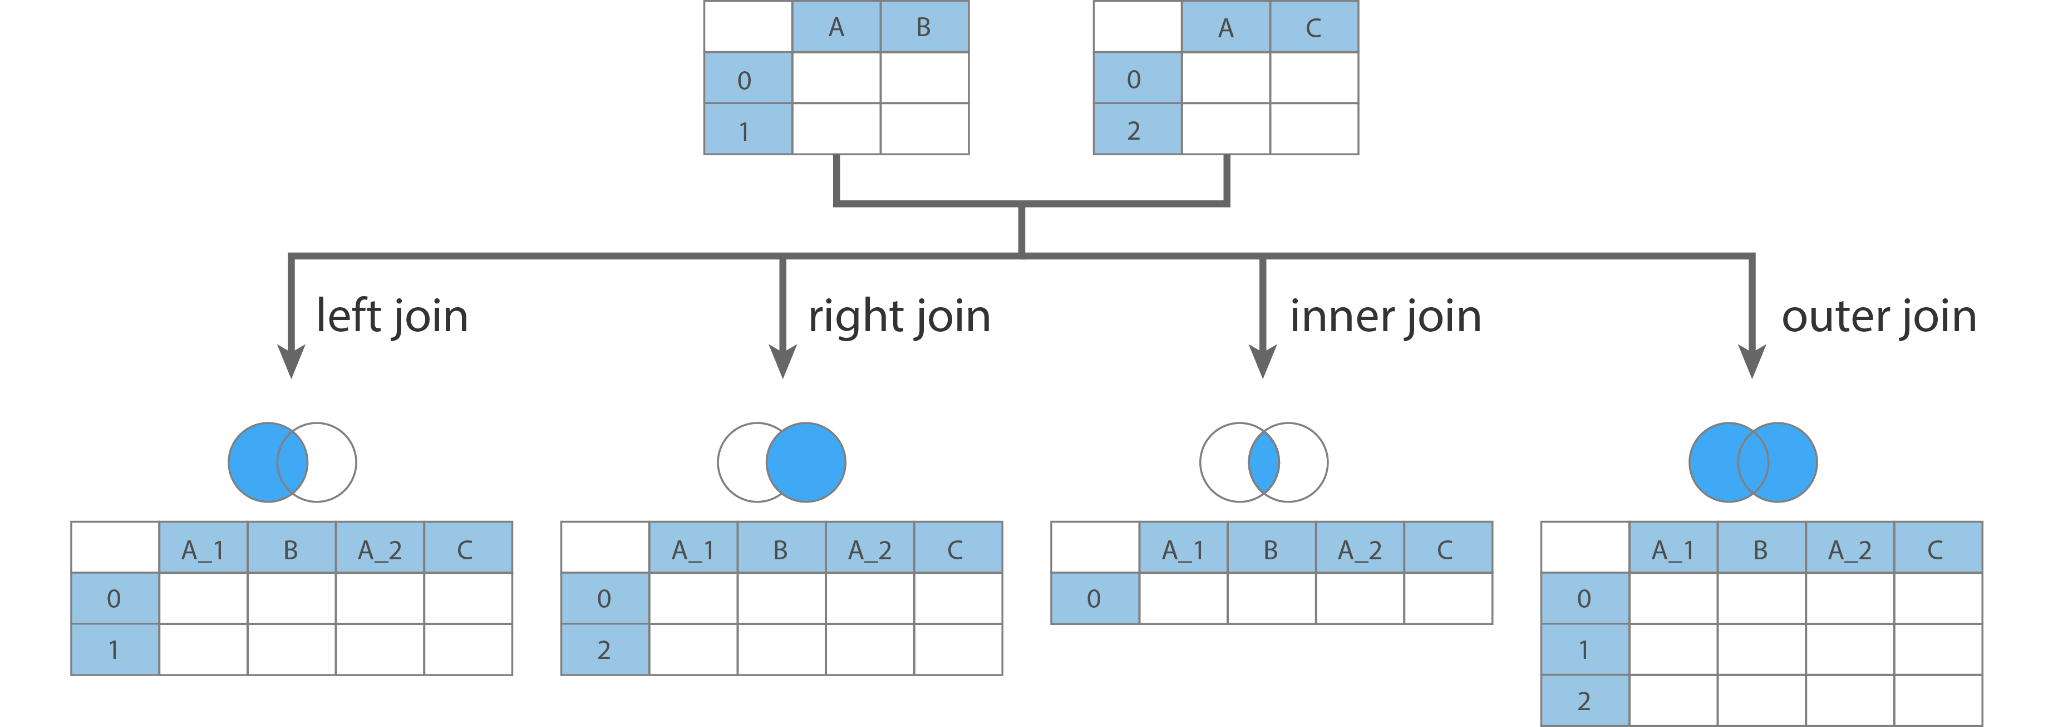

In [52]:
ratings_dates.head()

,userId,movieId,rating,date,year
0,1,1,4.0,2000-07-30 18:45:03,2000
1,1,3,4.0,2000-07-30 18:20:47,2000
2,1,6,4.0,2000-07-30 18:37:04,2000
3,1,47,5.0,2000-07-30 19:03:35,2000
4,1,50,5.0,2000-07-30 18:48:51,2000


In [53]:
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [54]:
joined_false = ratings_dates.join(
    movies,
    rsuffix='_right',
    how='left'
)
display(joined_false)

,userId,movieId,rating,date,year,movieId_right,title,genres
0,1,1,4.0,2000-07-30 18:45:03,2000,1.0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,1,3,4.0,2000-07-30 18:20:47,2000,2.0,Jumanji (1995),Adventure|Children|Fantasy
2,1,6,4.0,2000-07-30 18:37:04,2000,3.0,Grumpier Old Men (1995),Comedy|Romance
3,1,47,5.0,2000-07-30 19:03:35,2000,4.0,Waiting to Exhale (1995),Comedy|Drama|Romance
4,1,50,5.0,2000-07-30 18:48:51,2000,5.0,Father of the Bride Part II (1995),Comedy
...,...,...,...,...,...,...,...,...
100831,610,166534,4.0,2017-05-03 21:53:22,2017,NaN,NaN,NaN
100832,610,168248,5.0,2017-05-03 22:21:31,2017,NaN,NaN,NaN
100833,610,168250,5.0,2017-05-08 19:50:47,2017,NaN,NaN,NaN
100834,610,168252,5.0,2017-05-03 21:19:12,2017,NaN,NaN,NaN


При объединении таблиц по индексам в результирующую таблицу попали все строки из «левой» таблицы, а недостающие строки из «правой» были заполнены пропусками. Так работает тип объединения left.

In [55]:
joined_false = ratings_dates.join(
    movies,
    rsuffix='_right',
    how='right'
)
display(joined_false)

,userId,movieId,rating,date,year,movieId_right,title,genres
0,1,1,4.0,2000-07-30 18:45:03,2000,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,1,3,4.0,2000-07-30 18:20:47,2000,2,Jumanji (1995),Adventure|Children|Fantasy
2,1,6,4.0,2000-07-30 18:37:04,2000,3,Grumpier Old Men (1995),Comedy|Romance
3,1,47,5.0,2000-07-30 19:03:35,2000,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,1,50,5.0,2000-07-30 18:48:51,2000,5,Father of the Bride Part II (1995),Comedy
...,...,...,...,...,...,...,...,...
9737,64,3481,4.0,2006-10-22 12:37:45,2006,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy
9738,64,3489,3.0,2006-10-22 23:28:09,2006,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy
9739,64,3499,4.5,2006-10-22 23:26:41,2006,193585,Flint (2017),Drama
9740,64,3510,3.0,2006-10-22 23:27:26,2006,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation


In [56]:
joined_false = ratings_dates.join(
    movies,
    rsuffix='_right',
    how='inner'
)
display(joined_false)

,userId,movieId,rating,date,year,movieId_right,title,genres
0,1,1,4.0,2000-07-30 18:45:03,2000,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,1,3,4.0,2000-07-30 18:20:47,2000,2,Jumanji (1995),Adventure|Children|Fantasy
2,1,6,4.0,2000-07-30 18:37:04,2000,3,Grumpier Old Men (1995),Comedy|Romance
3,1,47,5.0,2000-07-30 19:03:35,2000,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,1,50,5.0,2000-07-30 18:48:51,2000,5,Father of the Bride Part II (1995),Comedy
...,...,...,...,...,...,...,...,...
9737,64,3481,4.0,2006-10-22 12:37:45,2006,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy
9738,64,3489,3.0,2006-10-22 23:28:09,2006,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy
9739,64,3499,4.5,2006-10-22 23:26:41,2006,193585,Flint (2017),Drama
9740,64,3510,3.0,2006-10-22 23:27:26,2006,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation


Однако это не тот результат, который мы хотели, ведь мы не получили соответствия фильмов и их рейтингов. Чтобы совместить таблицы по ключевому столбцу с помощью метода join(), необходимо использовать ключевой столбец в «правой» таблице в качестве индекса. Это можно сделать с помощью метода set_index(). Также необходимо указать название ключа в параметре on.

In [57]:
joined = ratings_dates.join(
    movies.set_index('movieId'),
    on='movieId',
    how='left'
)
display(joined.head())

,userId,movieId,rating,date,year,title,genres
0,1,1,4.0,2000-07-30 18:45:03,2000,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,1,3,4.0,2000-07-30 18:20:47,2000,Grumpier Old Men (1995),Comedy|Romance
2,1,6,4.0,2000-07-30 18:37:04,2000,Heat (1995),Action|Crime|Thriller
3,1,47,5.0,2000-07-30 19:03:35,2000,Seven (a.k.a. Se7en) (1995),Mystery|Thriller
4,1,50,5.0,2000-07-30 18:48:51,2000,"Usual Suspects, The (1995)",Crime|Mystery|Thriller


Обратите внимание, что в результате такого объединения остался лишь один столбец movieId.

### Метод объединения merge
параметы метода:
* right — присоединяемая таблица. По умолчанию она является «правой».
* how — параметр типа объединения. По умолчанию принимает значение 'inner'.
* on — параметр, который определяет, по какому столбцу происходит объединение. Определяется автоматически, но рекомендуется указывать вручную.
* left_on — если названия столбцов в «левой» и «правой» таблицах не совпадают, то данный параметр отвечает за наименования ключевого столбца исходной таблицы.
* right_on — аналогично предыдущему, параметр отвечает за наименование ключевого столбца присоединяемой таблицы.

In [58]:
merged = ratings_dates.merge(
    movies,
    on='movieId',
    how='left'
)
display(merged.head())

,userId,movieId,rating,date,year,title,genres
0,1,1,4.0,2000-07-30 18:45:03,2000,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,1,3,4.0,2000-07-30 18:20:47,2000,Grumpier Old Men (1995),Comedy|Romance
2,1,6,4.0,2000-07-30 18:37:04,2000,Heat (1995),Action|Crime|Thriller
3,1,47,5.0,2000-07-30 19:03:35,2000,Seven (a.k.a. Se7en) (1995),Mystery|Thriller
4,1,50,5.0,2000-07-30 18:48:51,2000,"Usual Suspects, The (1995)",Crime|Mystery|Thriller


In [59]:
print('Число строк в таблице ratings_dates: ', ratings_dates.shape[0])
print('Число строк в таблице merged: ', merged.shape[0])
print(ratings_dates.shape[0] == merged.shape[0])

Число строк в таблице ratings_dates:  100836
Число строк в таблице merged:  100836
True


→ Метод merge() с внешним (outer) типом объединения может использоваться как аналог метода concat() при объединении таблиц с одинаковой структурой (одинаковые количество и названия столбцов) по строкам. В таком случае все одноимённые столбцы таблиц будут считаться ключевыми.

In [60]:
merge_ratings = ratings1.merge(ratings2, how='outer')
print('Число строк в таблице merge_ratings: ', merge_ratings.shape[0])
display(merge_ratings)

Число строк в таблице merge_ratings:  100836


,userId,movieId,rating
0,1,1,4.0
1,1,3,4.0
2,1,6,4.0
3,1,47,5.0
4,1,50,5.0
...,...,...,...
100831,610,166534,4.0
100832,610,168248,5.0
100833,610,168250,5.0
100834,610,168252,5.0


Обратите внимание, что при использовании метода merge() для склейки двух таблиц у нас автоматически пропали дубликаты, которые мы видели при использовании метода concat(). Это особенность метода merge() — автоматическое удаление дублей.

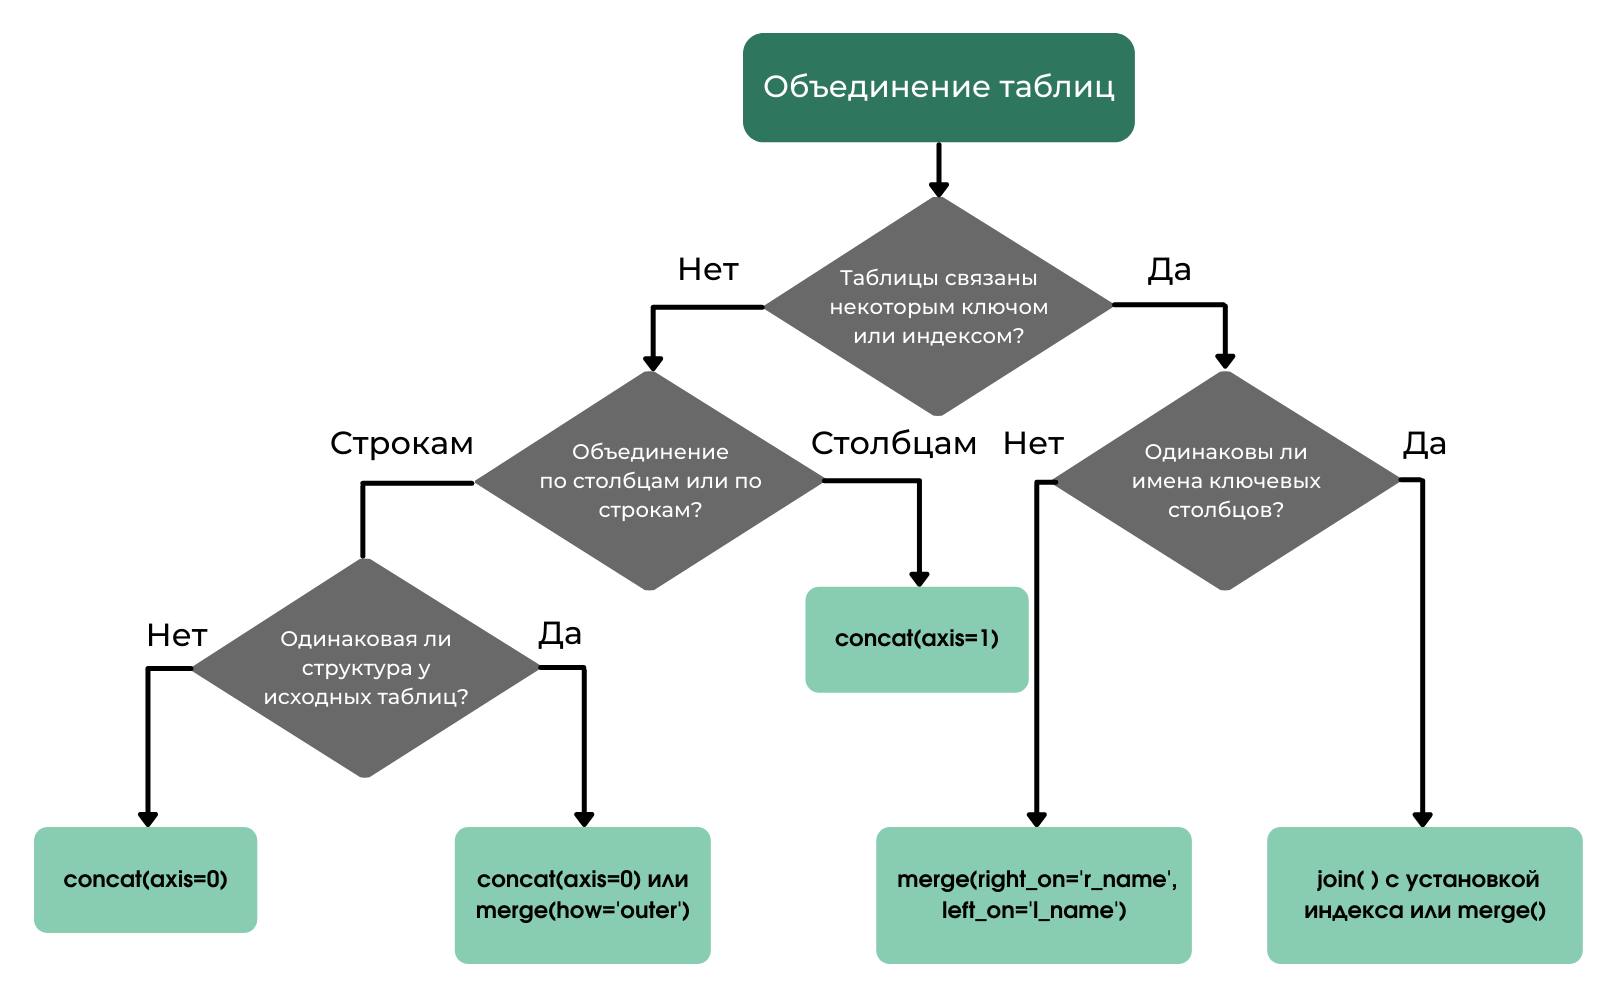

In [61]:
data_1 = pd.DataFrame({'Value': [100, 45, 80],
                       'Group': [1, 4, 5]},
                      index = ['I0', 'I1', 'I2']
                     )
data_2 = pd.DataFrame({'Company': ['Google', 'Amazon', 'Facebook'],
                       'Add': ['S0', 'S1', 'S7']},
                      index = ['I0', 'I1', 'I3']
                     )
data = data_1.join(data_2, how='inner')
data

,Value,Group,Company,Add
I0,100,1,Google,S0
I1,45,4,Amazon,S1


In [67]:
a = pd.DataFrame({'A': ['a', 'b', 'c'], 'B': [103, 214, 124], 'C': [1, 4, 2]})
b = pd.DataFrame({'V': ['d', 'b', 'c'], 'U': [1393.7, 9382.2, 1904.5], 'C': [1, 3, 2]})
a.merge(b, how='right', on='C')
a

,A,B,C
0,a,103,1
1,b,214,4
2,c,124,2


In [ ]:
items_df = pd.DataFrame({
    'item_id': [417283, 849734, 132223, 573943, 19475, 3294095, 382043, 302948, 100132, 312394],
    'vendor': ['Samsung', 'LG', 'Apple', 'Apple', 'LG', 'Apple', 'Samsung', 'Samsung', 'LG', 'ZTE'],
    'stock_count': [54, 33, 122, 18, 102, 43, 77, 143, 60, 19]
})
purchase_df = pd.DataFrame({
    'purchase_id': [101, 101, 101, 112, 121, 145, 145, 145, 145, 221],
    'item_id': [417283, 849734, 132223, 573943, 19475, 3294095, 382043, 302948, 103845, 100132],
    'price': [13900, 5330, 38200, 49990, 9890, 33000, 67500, 34500, 89900, 11400]
})
#шаг 1 - объединить таблицы по item_id

,item_id,vendor,stock_count
0,417283,Samsung,54
1,849734,LG,33
2,132223,Apple,122
3,573943,Apple,18
4,19475,LG,102
5,3294095,Apple,43
6,382043,Samsung,77
7,302948,Samsung,143
8,100132,LG,60
9,312394,ZTE,19


In [116]:
merged = items_df.join(
    purchase_df.set_index('item_id'),
    on = 'item_id',
    how = 'left'
)
merged = merged.drop(9, axis = 0)
merged['revenue'] = merged['price'] * merged['stock_count']
income = merged['revenue'].sum()
merged = merged.drop('revenue', axis = 1)
print(income)
display(merged)

19729490.0


,item_id,vendor,stock_count,purchase_id,price
0,417283,Samsung,54,101.0,13900.0
1,849734,LG,33,101.0,5330.0
2,132223,Apple,122,101.0,38200.0
3,573943,Apple,18,112.0,49990.0
4,19475,LG,102,121.0,9890.0
5,3294095,Apple,43,145.0,33000.0
6,382043,Samsung,77,145.0,67500.0
7,302948,Samsung,143,145.0,34500.0
8,100132,LG,60,221.0,11400.0


In [ ]:
import pandas as pd
items_df = pd.DataFrame({
            'item_id': [417283, 849734, 132223, 573943, 19475, 3294095, 382043, 302948, 100132, 312394],
            'vendor': ['Samsung', 'LG', 'Apple', 'Apple', 'LG', 'Apple', 'Samsung', 'Samsung', 'LG', 'ZTE'],
            'stock_count': [54, 33, 122, 18, 102, 43, 77, 143, 60, 19]
        })

purchase_df = pd.DataFrame({
            'purchase_id': [101, 101, 101, 112, 121, 145, 145, 145, 145, 221],
            'item_id': [417283, 849734, 132223, 573943, 19475, 3294095, 382043, 302948, 103845, 100132],
            'price': [13900, 5330, 38200, 49990, 9890, 33000, 67500, 34500, 89900, 11400]
        })
merged = items_df.merge(purchase_df, how='inner', on='item_id')
income = (merged['price'] * merged['stock_count']).sum()
